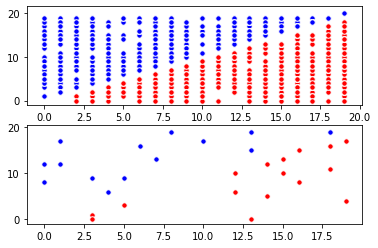

In [8]:
import pandas as pd
import xgboost as xgb
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def GetLabel(row):
    if row.y-row.x<0:
        return 0
    else:
        return 1
def DropDuplicate(row):
    if row.x==row.y:
        return row.y+1
    else:
        return row.y
train = pd.DataFrame({
    'x': [random.randrange(20) for i in range(1000)],
    'y': [random.randrange(20) for i in range(1000)],
})
train.y = train.apply(DropDuplicate,axis=1)
train['label'] = train.apply(GetLabel,axis=1)


test = pd.DataFrame({
    'x': [random.randrange(20) for i in range(30)],
    'y': [random.randrange(20) for i in range(30)],
})
test.y = test.apply(DropDuplicate,axis=1)
test['label'] = test.apply(GetLabel,axis=1)

#可视化
train_0 = train[train.label==0]
train_1 = train[train.label==1]
test_0 = test[test.label==0]
test_1 = test[test.label==1]
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.scatter(train_0.x, train_0.y, s=30, c='r' ,edgecolors= 'white')
ax1.scatter(train_1.x, train_1.y, s=30, c='b' ,edgecolors= 'white')
ax2.scatter(test_0.x, test_0.y, s=30, c='r' ,edgecolors= 'white')
ax2.scatter(test_1.x, test_1.y, s=30, c='b' ,edgecolors= 'white')
plt.show()

In [2]:
!pip install pandas

     |████████████████████████████████| 10.1MB 108kB/s eta 0:00:01
     |████████████████████████████████| 512kB 151kB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 120kB/s eta 0:00:01


In [4]:
!pip install xgboost

     |████████████████████████████████| 142.8MB 265kB/s eta 0:00:01    |███                             | 13.7MB 725kB/s eta 0:02:58     |████▌                           | 19.9MB 503kB/s eta 0:04:05     |██████▏                         | 27.4MB 34.4MB/s eta 0:00:04     |███████▉                        | 34.8MB 658kB/s eta 0:02:44     |████████▊                       | 39.1MB 689kB/s eta 0:02:31     |██████████████                  | 62.3MB 638kB/s eta 0:02:07     |███████████████                 | 67.2MB 656kB/s eta 0:01:56     |███████████████▍                | 68.7MB 656kB/s eta 0:01:53     |██████████████████▏             | 81.2MB 705kB/s eta 0:01:28     |███████████████████▎            | 85.9MB 705kB/s eta 0:01:21     |████████████████████            | 88.8MB 824kB/s eta 0:01:06     |████████████████████▍           | 91.1MB 824kB/s eta 0:01:03     |█████████████████████▌          | 95.9MB 702kB/s eta 0:01:07     |█████████████████████▋          | 96.4MB 702kB/s eta 0:01:07     |███

In [6]:
!pip install matplotlib sklearn

     |████████████████████████████████| 13.1MB 95kB/s eta 0:00:011    |█████████████████▎              | 7.1MB 126kB/s eta 0:00:48
     |████████████████████████████████| 71kB 96kB/s eta 0:00:011
     |████████████████████████████████| 92kB 75kB/s eta 0:00:01
     |████████████████████████████████| 6.7MB 127kB/s eta 0:00:01
     |████████████████████████████████| 286kB 191kB/s eta 0:00:01
  Stored in directory: /home/zhangzhengzhang/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [10]:
train_data = train[['x','y']]
train_label = train[['label']]
test_data = test[['x','y']]
test_compare = test
dataset1 = xgb.DMatrix(train_data,label=train_label)
dataset2 = xgb.DMatrix(test_data)


params={'booster':'gbtree',
        'objective': 'rank:pairwise',
        'eval_metric':'auc',
        'gamma':0.1,
        'min_child_weight':1.1,
        'max_depth':5,
        'lambda':10,
        'subsample':0.7,
        'colsample_bytree':0.7,
        'colsample_bylevel':0.7,
        'eta': 0.01,
        'tree_method':'exact',
        'seed':0,
        'nthread':12
        }
model = xgb.train(params,dataset1,num_boost_round=100)
print('-------------model train done-----------')
test_compare['labelpre'] = model.predict(dataset2)
print(test_compare)

-------------model train done-----------
     x   y  label  labelpre
0   13  19      1  0.752779
1    3   9      1  0.850479
2   18  19      1  0.522710
3   15  10      0  0.268538
4   19   4      0  0.013182
5   12  10      0  0.524157
6   18  16      0  0.511862
7   13   0      0  0.104972
8   12   6      0  0.305272
9    8  19      1  0.857577
10   5   9      1  0.623780
11   4   6      1  0.502757
12  16  15      0  0.384362
13  16   8      0  0.182675
14   3   1      0  0.531277
15  18  11      0  0.272550
16   0   8      1  0.824645
17   7  13      1  0.822505
18  14  12      0  0.338989
19  15  13      0  0.386647
20  10  17      1  0.757003
21   5   3      0  0.313330
22   6  16      1  0.973646
23   1  17      1  1.177797
24  19  17      0  0.511862
25  13  15      1  0.590466
26   0  12      1  0.971700
27   1  12      1  0.971700
28   3   0      0  0.531277
29  14   5      0  0.048413
